In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def cluster_and_visualise(datafilename, K, featurenames):
    # reads the data file that the user inputs
    values = np.genfromtxt(datafilename, delimiter=",")

    if type(featurenames) != tuple:
        ft = featurenames.split(",")
        lenn  = len(ft)
    else:
        ft = featurenames
        lenn  = len(ft)
    
    # find the K-means of the dataset
    clusterModel = KMeans(n_clusters=K)
    clusterModel.fit(values)
    cluster_ids = clusterModel.predict(values)

    size = lenn * 6

    fig, ax = plt.subplots(lenn, lenn, figsize = (size,size), squeeze = False)
    
    # plot the scatter matrix
    x = 0
    while x < lenn:
        for y in range(lenn):
            ax[x, y].set_xlabel(ft[x])
            if (x == y):
                # if x and y values are the same, a histogram will be generated
                ax[x, y].set_title(f'Histogram for {ft[x]}', loc='center')
                ax[x, y].hist(values[:,x])
            else:
                # if x and y values are different, a scatter plot will be generated
                ax[x, y].set_title(f'Scatter Plot for {ft[x]} & {ft[y]}', loc='center')
                ax[x, y].scatter(values[:,x],values[:,y],c=cluster_ids)
                ax[x, y].set_ylabel(ft[y])
        x += 1

    # shows the title of the scatter matrix
    title = plt.suptitle(f"Quality Visualiser for quality fwens with {K} clusters each", fontsize=size*2.5)
    # saves the visuaisation as a jpg
    plt.savefig("myVisualisation.jpg")
    return fig, ax

(<Figure size 2592x2592 with 36 Axes>,
 array([[<AxesSubplot:title={'center':'Histogram for mean_red'}, xlabel='mean_red'>,
         <AxesSubplot:title={'center':'Scatter Plot for mean_red & mean_green'}, xlabel='mean_red', ylabel='mean_green'>,
         <AxesSubplot:title={'center':'Scatter Plot for mean_red & mean_blue'}, xlabel='mean_red', ylabel='mean_blue'>,
         <AxesSubplot:title={'center':'Scatter Plot for mean_red & width'}, xlabel='mean_red', ylabel='width'>,
         <AxesSubplot:title={'center':'Scatter Plot for mean_red & height'}, xlabel='mean_red', ylabel='height'>,
         <AxesSubplot:title={'center':'Scatter Plot for mean_red & weight'}, xlabel='mean_red', ylabel='weight'>],
        [<AxesSubplot:title={'center':'Scatter Plot for mean_green & mean_red'}, xlabel='mean_green', ylabel='mean_red'>,
         <AxesSubplot:title={'center':'Histogram for mean_green'}, xlabel='mean_green'>,
         <AxesSubplot:title={'center':'Scatter Plot for mean_green & mean_blue'}, 

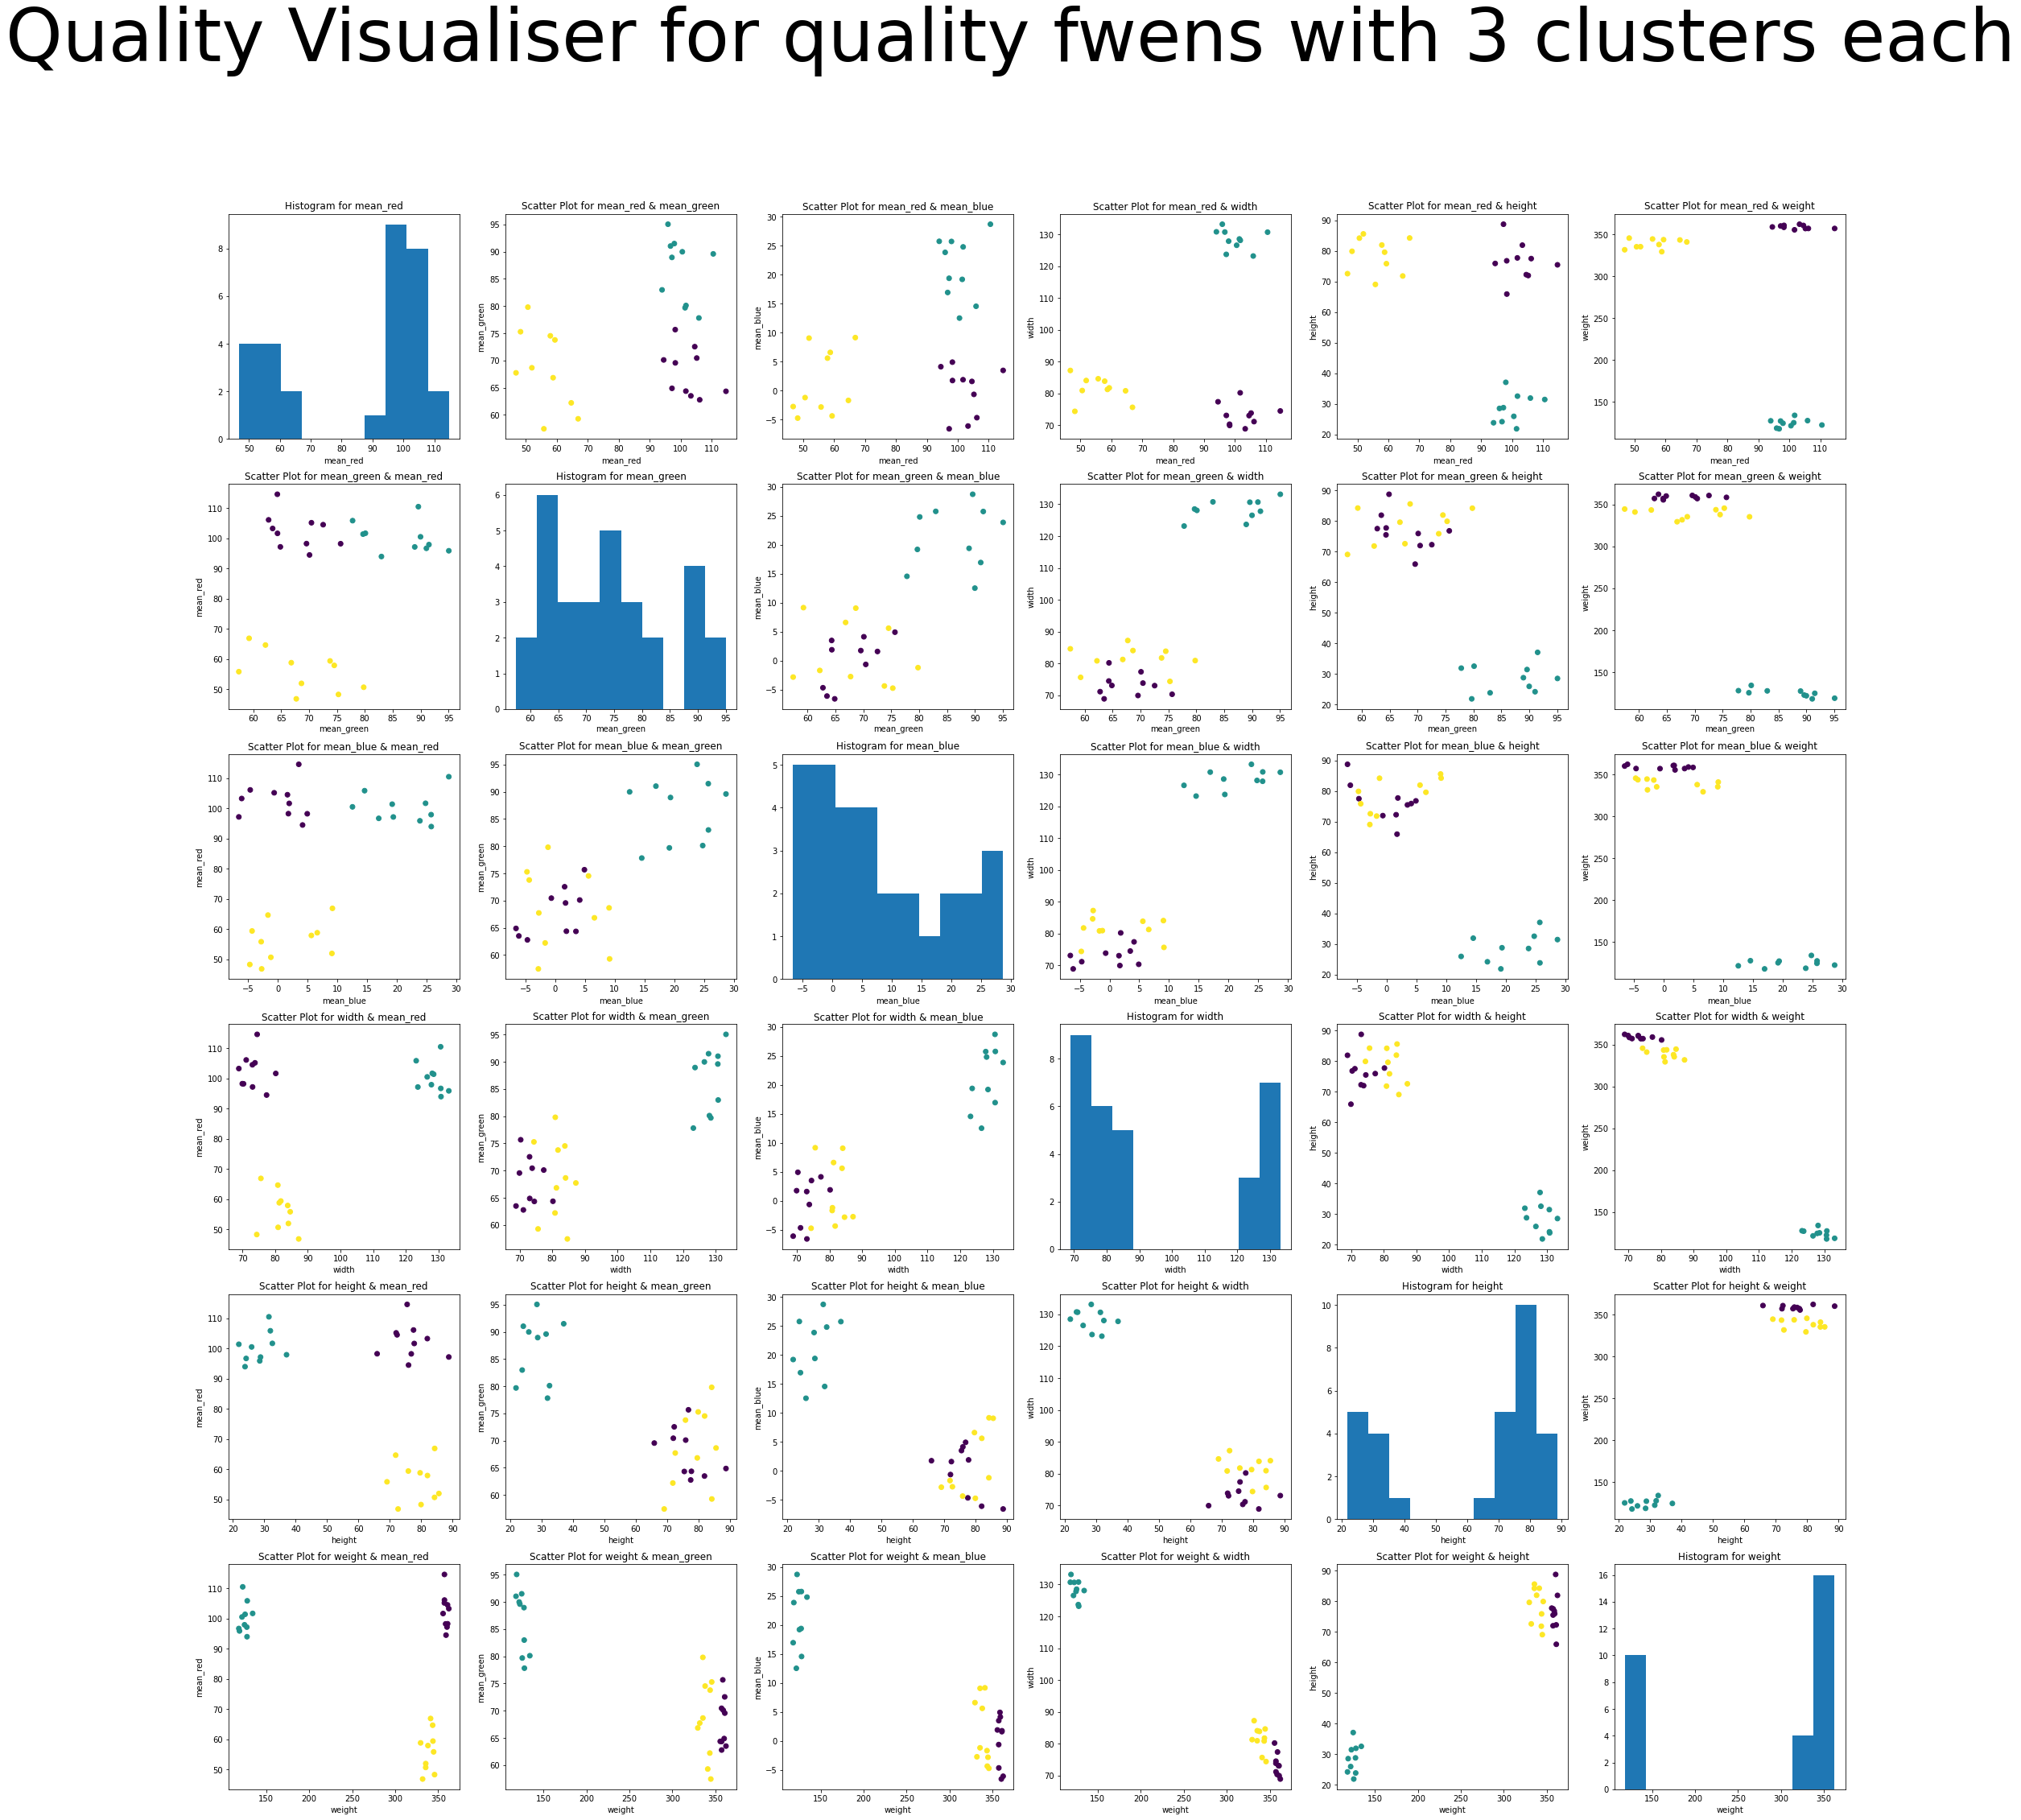

In [2]:
featurenames = ('mean_red','mean_green','mean_blue', 'width','height','weight')

datafile = "fruit_values.csv"

cluster_and_visualise(datafile, 3, featurenames)